# Personal Notebook

C:\Users\rdgbr\Documents\University_Stuff\Fall 2023\Capstone 2\algae_dataset-20230830T143834Z-001\algae_dataset

In [25]:
import os
from pathlib import Path
import shutil
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2 as cv
import torch
from torch import nn
from PIL import Image


# Manage Data

## Reorganize The Data On Secondary Storage (only needs to be done once)

In [23]:
data_answers = []

parent = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\algae_dataset'
path = Path(parent)
home = str(path.parent.absolute())
data_dir = home+'\\data'
#os.mkdir(home+'\\data')
os.chdir(parent)

file_id = 0
catagories = os.listdir()
for i, c in enumerate(catagories):
    os.chdir(parent + '\\' + c)
    files = os.listdir()
    for f in files:
        file_id += 1
        original = os.getcwd() + '\\' + f
        target = data_dir + '\\' + f'{file_id}' + '.jpg'
        #shutil.copyfile(original, target)
        data_answers.append([file_id,i])
os.chdir(home)
print('done')

done


In [24]:
map_file = 'mapping.csv'

os.chdir(home)
with open(map_file,'w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['file_id','category'])
    writer.writerows(data_answers)

Realize that the size of the images are wack smh. So filter out the images based on the ones who have the same size

(240, 320, 3)
False
True


C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_10828\1511874359.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


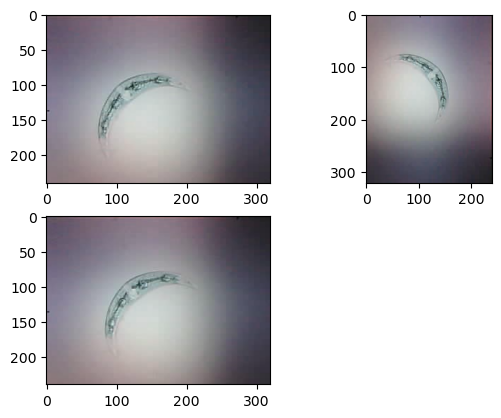

In [42]:
img1 = cv.imread('data\\1.jpg')
img2 = cv.imread('data\\2.jpg')
img3 = cv.imread('data\\3.jpg')

print(img1.shape)
plt.imshow(img1)
plt.subplot(2,2,1)
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img3)
print(img1.shape == img2.shape)
print(img1.shape == img3.shape)


In [26]:
os.chdir('G:\\School Stuff\\Fall 2023\\Cap 2\\wa')
new_data_dir = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\filtered'

os.mkdir(new_data_dir)

img1 = cv.imread('data\\1.jpg')
default_shape = img1.shape
print(default_shape)
data_dir = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\data'
os.chdir(data_dir)
files = os.listdir()
for f in files:
    img = cv.imread(f)
    if img.shape == default_shape:
        original = data_dir + '\\' + f
        target = new_data_dir + '\\' + f
        shutil.copyfile(original, target)

os.chdir('G:\\School Stuff\\Fall 2023\\Cap 2\\wa')
        


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\filtered'

In [14]:
os.chdir('G:\\School Stuff\\Fall 2023\\Cap 2\\wa')
new_map_file = 'mapping_filtered.csv'
map_file = 'mapping.csv'

f_original = open(map_file,'r')
f_filtered = open(new_map_file,'w',newline='')


writer_filtered = csv.writer(f_filtered)
data = list(csv.reader(f_original, delimiter=","))
data_filtered = []
files = os.listdir('G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\filtered')

for f in files:
    i = int(f[:-4])
    data_filtered.append(data[i])

writer_filtered.writerow(['file_id','category'])
writer_filtered.writerows(data_filtered)

f_original.close()
f_filtered.close()

## Prepare Training and Testing set

In [97]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

In [98]:
map_file = 'mapping.csv'
df = pd.read_csv(map_file)
len(df)

2197

In [100]:
class AlgeaDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.resize = transforms.Resize((128,128))
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        #img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0] + '.jpg')
        img_path = self.root_dir + f'//{self.annotations.iloc[index,0]}.jpg'
        image = Image.open(img_path)
        image = self.resize(image)
        y_label = torch.tensor(int(self.annotations.iloc[index,1])).to(device)
        
        if self.transform:
            image = self.transform(image).to(device)
        
        return (image,y_label)

root_dir = 'G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\data'
#dataset = AlgeaDataset(map_file,root_dir, transform = torch.tensor)

dataset = AlgeaDataset('G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\mapping_filtered.csv','G:\\School Stuff\\Fall 2023\\Cap 2\\wa\\filtered', transform = transforms.ToTensor())

generator = torch.Generator().manual_seed(42)
train_set, test_set = torch.utils.data.random_split(dataset,[0.7,0.3],generator)
print(len(dataset))
print(len(train_set))
print(len(test_set))
batch_size = 20
train_loader = DataLoader(dataset=train_set, batch_size=batch_size,shuffle=True)


test_loader = DataLoader(dataset=test_set, batch_size=batch_size,shuffle=True)

1384
969
415


torch.Size([3, 128, 128])
torch.Size([3, 128, 128])


TypeError: Invalid shape (3, 128, 128) for image data

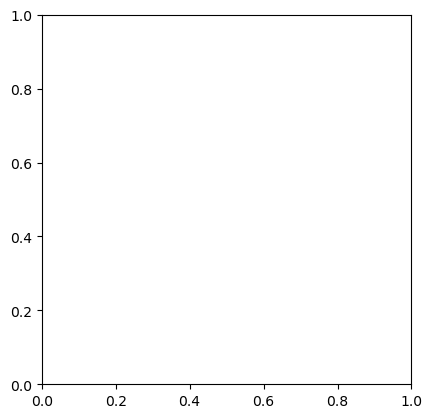

In [41]:
default_shape = dataset[0][0].shape
bruh_shape = dataset[1][0].shape
print(default_shape)
print(bruh_shape)
#for i in 
type(dataset[1][0])
plt.imshow(dataset[1][0].numpy())


# Model

In [128]:
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

In [134]:
class LeNet(Module):
	def __init__(self, numChannels, classes):
		# call the parent constructor
		super(LeNet, self).__init__()

		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = Conv2d(in_channels=numChannels, out_channels=20,kernel_size=(5, 5))
		self.relu1 = ReLU()
		self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = Conv2d(in_channels=20, out_channels=20,kernel_size=(5, 5))
		self.relu2 = ReLU()
		self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		# initialize second set of CONV => RELU => POOL layers
		self.conv3 = Conv2d(in_channels=20, out_channels=20,kernel_size=(5, 5))
		self.relu3 = ReLU()
		self.maxpool3 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		# initialize second set of CONV => RELU => POOL layers
		self.conv4 = Conv2d(in_channels=20, out_channels=5,kernel_size=(5, 5))
		self.relu4 = ReLU()
		self.maxpool4 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

		# initialize first (and only) set of FC => RELU layers
		self.fc1 = Linear(in_features=80, out_features=20)
		self.relu5 = ReLU()
		self.fc2 = Linear(in_features=20, out_features=20)
		self.relu6 = ReLU()


		# initialize our softmax classifier
		self.fc3 = Linear(in_features=20, out_features=classes)
		#self.logSoftmax = LogSoftmax(dim=1)

	def forward(self, x):
		# pass the input through our first set of CONV => RELU =>
		# POOL layers
		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		# pass the output from the previous layer through the second
		# set of CONV => RELU => POOL layers
		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = self.conv3(x)
		x = self.relu3(x)
		x = self.maxpool3(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = self.conv4(x)
		x = self.relu4(x)
		x = self.maxpool4(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = flatten(x,1)
		#print(x.shape)
		x = self.fc1(x)
		x = self.relu5(x)
		x = self.fc2(x)
		x = self.relu6(x)
		# pass the output to our softmax classifier to get our output
		# predictions
		x = self.fc3(x)
		output = x #self.logSoftmax(x)
		# return the output predictions
		return output

model = LeNet(3,5).to(device)

## Train Model

In [137]:
#criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
num_epochs = 50
learning_rate = 0.05
criterion = nn.CrossEntropyLoss()
criterion.to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate (train_loader):
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 20 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 50, step 20/49, loss = 0.8207
epoch 1 / 50, step 40/49, loss = 1.3371
epoch 2 / 50, step 20/49, loss = 1.1186
epoch 2 / 50, step 40/49, loss = 0.9844
epoch 3 / 50, step 20/49, loss = 1.1469
epoch 3 / 50, step 40/49, loss = 1.2327
epoch 4 / 50, step 20/49, loss = 1.4319
epoch 4 / 50, step 40/49, loss = 1.3786
epoch 5 / 50, step 20/49, loss = 1.0504
epoch 5 / 50, step 40/49, loss = 1.1166
epoch 6 / 50, step 20/49, loss = 1.4426
epoch 6 / 50, step 40/49, loss = 1.2047
epoch 7 / 50, step 20/49, loss = 1.3344
epoch 7 / 50, step 40/49, loss = 1.2395
epoch 8 / 50, step 20/49, loss = 1.1812
epoch 8 / 50, step 40/49, loss = 0.8006
epoch 9 / 50, step 20/49, loss = 1.0571
epoch 9 / 50, step 40/49, loss = 1.1246
epoch 10 / 50, step 20/49, loss = 1.2900
epoch 10 / 50, step 40/49, loss = 1.0917
epoch 11 / 50, step 20/49, loss = 0.9156
epoch 11 / 50, step 40/49, loss = 1.2637
epoch 12 / 50, step 20/49, loss = 1.2200
epoch 12 / 50, step 40/49, loss = 0.9503
epoch 13 / 50, step 20/49, loss = 

In [119]:

lmao = iter(train_loader)

images, labels = next(lmao)

print(images.shape)
print(labels.shape)

torch.Size([20, 3, 128, 128])
torch.Size([20])


In [138]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate (train_loader):
        outputs = model(images)
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

    
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate (test_loader):
        outputs = model(images)
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 55.624355005159956
accuracy = 52.7710843373494
